Column Names: ['773_1P', '773_2P', '773_4P']
Dataframe loaded successfully.
Top X feature numbers calculated successfully.
Sets for Venn diagram created successfully.


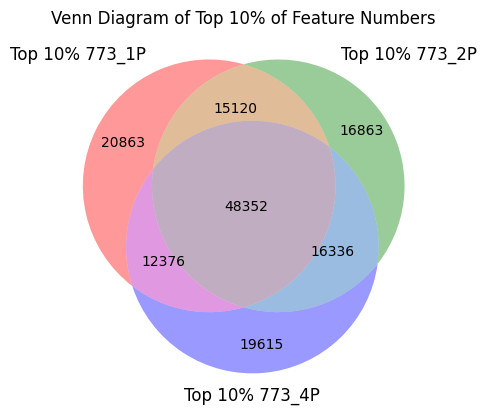

In [1]:
import traceback
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

def plot_top_X_venn(csv_file, column_names, X):
    try:
        # Read only necessary columns from the CSV file
        df = pd.read_csv(csv_file, usecols=['FeatureNum'] + column_names)
        print("Dataframe loaded successfully.")

        # Initialize a set to store top X% feature numbers
        top_X_feature_nums = set()
        
        # Find Feature Numbers in the top X% for each column
        for col in column_names:
            # Sort the column
            sorted_column = df.sort_values(by=col, ascending=False)
            # Calculate the threshold value for X% of the data
            threshold = sorted_column[col].quantile(1 - X/100)
            # Select the rows where the column value is greater than the threshold
            top_X_rows = sorted_column[sorted_column[col] > threshold]
            # Add the FeatureNums to the set
            top_X_feature_nums.update(top_X_rows['FeatureNum'])
        print("Top X feature numbers calculated successfully.")
        
        # Create sets for Venn diagram
        sets = []
        for col in column_names:
            sets.append(set(df[df[col] > df[col].quantile(1 - X/100)]['FeatureNum']))
        print("Sets for Venn diagram created successfully.")
        
        # Plot Venn diagram
        plt.figure()
        venn_diagram = venn3(sets, set_labels=('Top {}% {}'.format(X, column_names[0]), 'Top {}% {}'.format(X, column_names[1]), 'Top {}% {}'.format(X, column_names[2])))
        plt.title('Venn Diagram of Top {}% of Feature Numbers'.format(X))

        plt.show()
    except Exception as e:
        print("An error occurred:", e)
        print(traceback.format_exc())

# Implementation:
csv_file_path = "/Users/noahnicol/Desktop/Desktop/Job_Stuff/Proteovista/Protein Comparison/Master sheet_3_exp.csv"
column_names = ['773_1P', '773_2P', '773_4P',]  # Input column names
X = 10  # Input desired X value

print("Column Names:", column_names)
plot_top_X_venn(csv_file_path, column_names, X)


Dataframe loaded successfully.


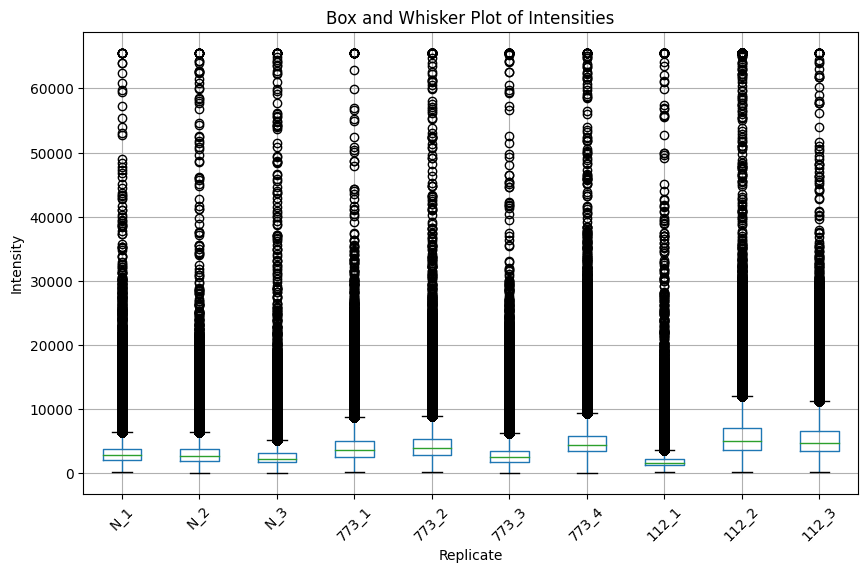

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def plot_box_whisker(csv_file, column_names):
    try:
        # Read only necessary columns from the CSV file
        df2 = pd.read_csv(csv_file, usecols=column_names)
        print("Dataframe loaded successfully.")
        
        # Convert non-numerical columns to numerical
        idx = 0
        for col in column_names:
            if df2[col].dtype == 'object':
                df2[col] = pd.to_numeric(df2[col], errors='coerce')
                print(f"Removed non-numeric data from column {column_names[idx]}")
            idx += 1
        
        # Replace zero values with NaN
        df2.replace(0, np.nan, inplace=True)

        # Drop rows with missing values
        df2.dropna(inplace=True)
        
        # Plot box and whisker plot
        plt.figure(figsize=(10, 6))
        df2.boxplot()
        plt.title('Box and Whisker Plot of Intensities')
        plt.xlabel('Replicate')
        plt.ylabel('Intensity')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()
        
    except Exception as e:
        print("An error occurred:", e)
        print(traceback.format_exc())

csv_file_path = "/Users/noahnicol/Desktop/Desktop/Job_Stuff/Proteovista/Protein Comparison/Master sheet_3_exp.csv"
column_names = ['N_1', 'N_2', 'N_3', '773_1', '773_2', '773_3', '773_4', '112_1', '112_2', '112_3']  

plot_box_whisker(csv_file_path, column_names)


In [6]:
import pandas as pd

def count_data_below_threshold(csv_file, column_names, threshold):
    try:
        # Read only necessary columns from the CSV file
        df3 = pd.read_csv(csv_file, usecols=column_names)
        print("Dataframe loaded successfully.")
        
        for col in column_names:
            # Count the number of values below the threshold
            count_below_threshold = df3[col][df3[col] < threshold].count()
            # Calculate the total count
            total_count = len(df3[col])
            #calculate mean + median
            col_mean = df3[col].mean()
            col_median = df3[col].median()
            # Calculate the percentage of values below the threshold
            percentage_below_threshold = (count_below_threshold / total_count) * 100 if total_count > 0 else 0
            # Print the count and percentage
            print("Total count of values below {}: {} ({}%) in column '{}' with mean {} and median {}".format(threshold, count_below_threshold, round(percentage_below_threshold, 2), col, round(col_mean,1), col_median))
        
    except Exception as e:
        print("An error occurred:", e)
        print(traceback.format_exc())

csv_file_path = "/Users/noahnicol/Desktop/Desktop/Job_Stuff/Proteovista/Protein Comparison/Master sheet_3_exp.csv"
column_names = ['N_1', 'N_2', 'N_3', '773_1', '773_2', '773_3', '773_4', '112_1', '112_2', '112_3']  
threshold = 1000  # Input your threshold value here

count_data_below_threshold(csv_file_path, column_names, threshold)


Dataframe loaded successfully.
Total count of values below 1000: 36472 (3.77%) in column 'N_1' with mean 3276.1 and median 2825.0
Total count of values below 1000: 39477 (4.08%) in column 'N_2' with mean 3177.8 and median 2637.0
Total count of values below 1000: 53836 (5.57%) in column 'N_3' with mean 2654.3 and median 2260.0
Total count of values below 1000: 37903 (3.92%) in column '773_1' with mean 4025.5 and median 3566.0
Total count of values below 1000: 29087 (3.01%) in column '773_2' with mean 4340.3 and median 3882.0
Total count of values below 1000: 74041 (7.65%) in column '773_3' with mean 2880.2 and median 2519.0
Total count of values below 1000: 6200 (0.64%) in column '773_4' with mean 4921.5 and median 4485.0
Total count of values below 1000: 88853 (9.19%) in column '112_1' with mean 2000.0 and median 1583.0
Total count of values below 1000: 22705 (2.35%) in column '112_2' with mean 5772.9 and median 5028.0
Total count of values below 1000: 24810 (2.56%) in column '112_3' w

Dataframe loaded successfully.


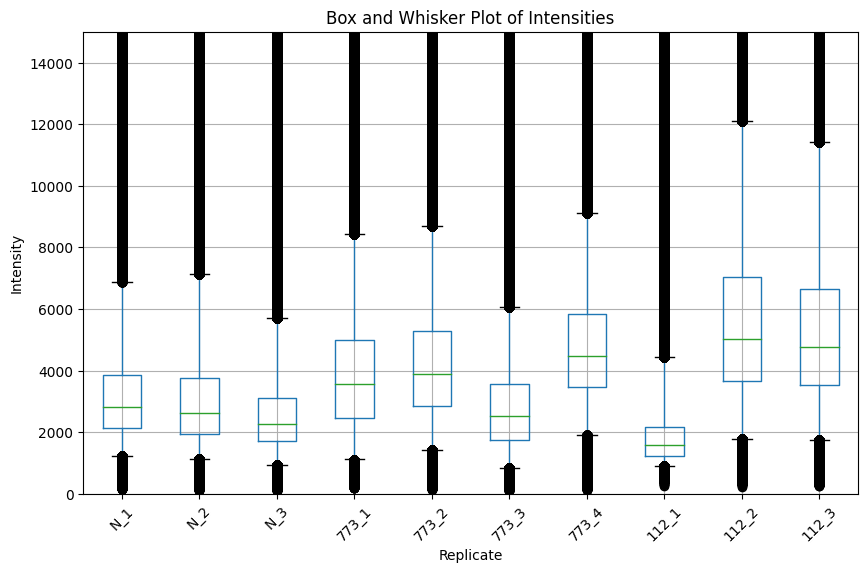

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_box_whisker(csv_file, column_names):
    try:
        # Read only necessary columns from the CSV file
        df = pd.read_csv(csv_file, usecols=column_names)
        print("Dataframe loaded successfully.")
        
        # Convert non-numerical columns to numerical
        for col in column_names:
            if df[col].dtype == 'object':
                df[col] = pd.to_numeric(df[col], errors='coerce')
                print(f"Removed non-numeric data from column {col}")
                
        # Filter values above 30,000
        # df = df[df <= 30000]

        # Plot box and whisker plot
        plt.figure(figsize=(10, 6))
        df.boxplot(whis=[5, 95])
        plt.title('Box and Whisker Plot of Intensities')
        plt.xlabel('Replicate')
        plt.ylabel('Intensity')
        plt.xticks(rotation=45)
        plt.ylim(0, 15000)# Set y-axis limit to 15,000
        plt.grid(True)
        plt.show()
        
    except Exception as e:
        print("An error occurred:", e)

csv_file_path = "/Users/noahnicol/Desktop/Desktop/Job_Stuff/Proteovista/Protein Comparison/Master sheet_3_exp.csv"
column_names = ['N_1', 'N_2', 'N_3', '773_1', '773_2', '773_3', '773_4', '112_1', '112_2', '112_3']  

plot_box_whisker(csv_file_path, column_names)
